In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

In [2]:
# Get the absolute path of the current file
try:
    # Works in .py scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter
    current_dir = os.getcwd()

# Go up N levels (here N=2, but you can adjust)
project_root = os.path.abspath(os.path.join(current_dir, ".."))

# Add the project root to sys.path if not already there so that the ML_toolbox can be imported
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from ML_toolbox import d_lm_analytical_solution_class

In [4]:
# --------------------------------------------------------------------------
# set up plotting parameters
# --------------------------------------------------------------------------
line_width_1 = 2
line_width_2 = 2
marker_1 = '.' # point
marker_2 = 'o' # circle
marker_size = 12
line_style_1 = ':' # dotted line
line_style_2 = '-' # solid line

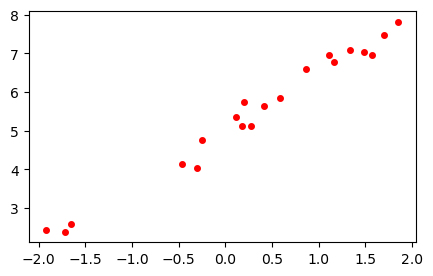

In [7]:
in_file_name = "../../data/linear_regression_test_data.csv"

dataIn = pd.read_csv(in_file_name)
x = np.array(dataIn['x'])
y = np.array(dataIn['y'])
y_theoretical = np.array(dataIn['y_theoretical'])

# plot the data
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(x, y, color='red', marker=marker_1, linewidth=line_width_1)

In [8]:
n = len(x)

x_bar = np.mean(x)
y_bar = np.mean(y)

# do linear regression using my own function
lm_d_result = d_lm_analytical_solution_class.d_lm(x, y)

print('My results are:')
print(lm_d_result['beta_1_hat'])
print(lm_d_result['beta_0_hat'])

My results are:
1.473602354178731
5.009810010438666


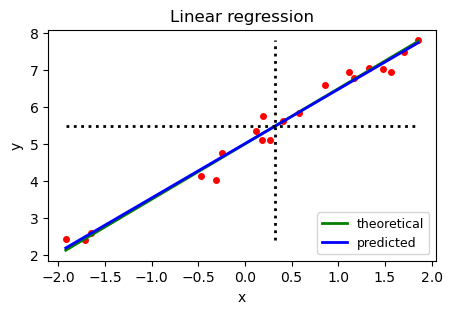

In [10]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, color='red', marker=marker_1, linewidth=line_width_1)
ax.plot(x, y_theoretical, color='green', label='theoretical', linewidth=line_width_1)
ax.plot(x, lm_d_result['y_hat'], color='blue', label='predicted', linewidth=line_width_1)
ax.plot(x, np.ones(n)*y_bar, color='black', linestyle=':', linewidth=line_width_1)
ax.plot([x_bar, x_bar], [np.min(y), np.max(y)], color='black', linestyle=':', linewidth=line_width_1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Linear regression")
ax.legend(loc='lower right', fontsize=9)

In [11]:
# do linear regression using sklearn
lm_sklearn= linear_model.LinearRegression()
x_reshaped = x.reshape((len(x), 1))
lm_sklearn.fit(x_reshaped, y)

# print out the results
print()
print('Results from sklearn are:')
print(lm_sklearn.coef_)
print(lm_sklearn.intercept_)


Results from sklearn are:
[1.47360235]
5.009810010438667


In [ ]:
# do linear regression using statsmodel
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())